In [2]:
!git clone https://github.com/michaelhunter12/EDA.git

Cloning into 'EDA'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 41 (delta 5), reused 3 (delta 3), pack-reused 33 (from 2)
Receiving objects: 100% (41/41), 4.94 MiB | 2.58 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [18]:
gifts = pd.read_csv("./EDA/assignment/data/ForeignGifts_edu.csv")
gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [20]:
gifts["Foreign Gift Amount"].describe()

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


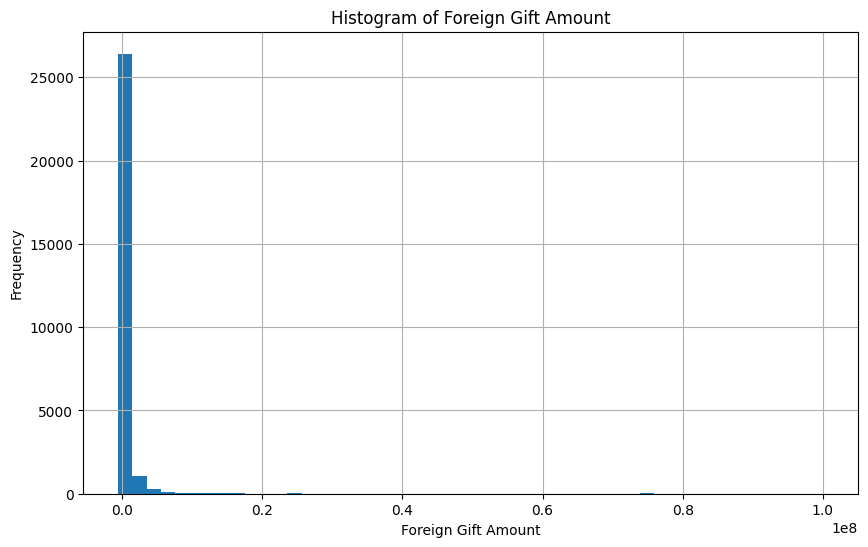

In [17]:
plt.figure(figsize=(10, 6))
gifts['Foreign Gift Amount'].hist(bins=50)
plt.title('Histogram of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the majority of Foreign Gifts are comparatively "small", but there is a very large skew to the right, indicating that there a few very comparatively large gift amounts. Most of the gift amount falls into a very tight range, with a few notable exceptions.

In [23]:
gifts["Gift Type"].value_counts()

,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [25]:
total_gifts = gifts['Gift Type'].count()

contract_proportion = gifts['Gift Type'].value_counts(normalize=True).get('Contract', 0)
monetary_proportion = gifts['Gift Type'].value_counts(normalize=True).get('Monetary Gift', 0)
real_estate_proportion = gifts['Gift Type'].value_counts(normalize=True).get('Real Estate', 0)

print(f"Proportion of Contracts: {contract_proportion:.4f}")
print(f"Proportion of Monetary Gifts: {monetary_proportion:.4f}")
print(f"Proportion of Real Estate: {real_estate_proportion:.4f}")

#Code from GeminiAI

Proportion of Contracts: 0.6121
Proportion of Monetary Gifts: 0.3875
Proportion of Real Estate: 0.0004


In [34]:
gifts_positive_amount = gifts[gifts['Foreign Gift Amount'] > 0].copy()
gifts_positive_amount['log_Foreign_Gift_Amount'] = np.log(gifts_positive_amount['Foreign Gift Amount'])

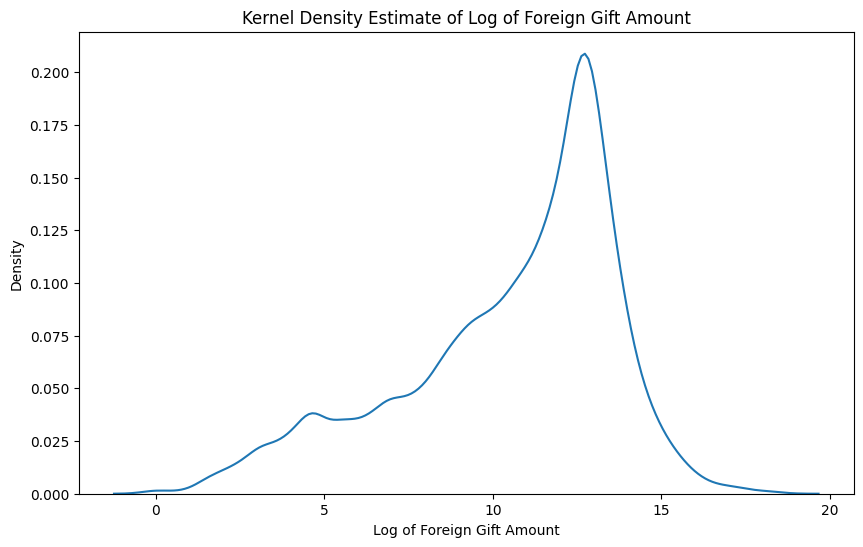

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(gifts_positive_amount['log_Foreign_Gift_Amount'], fill=False)
plt.title('Kernel Density Estimate of Log of Foreign Gift Amount')
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.show()

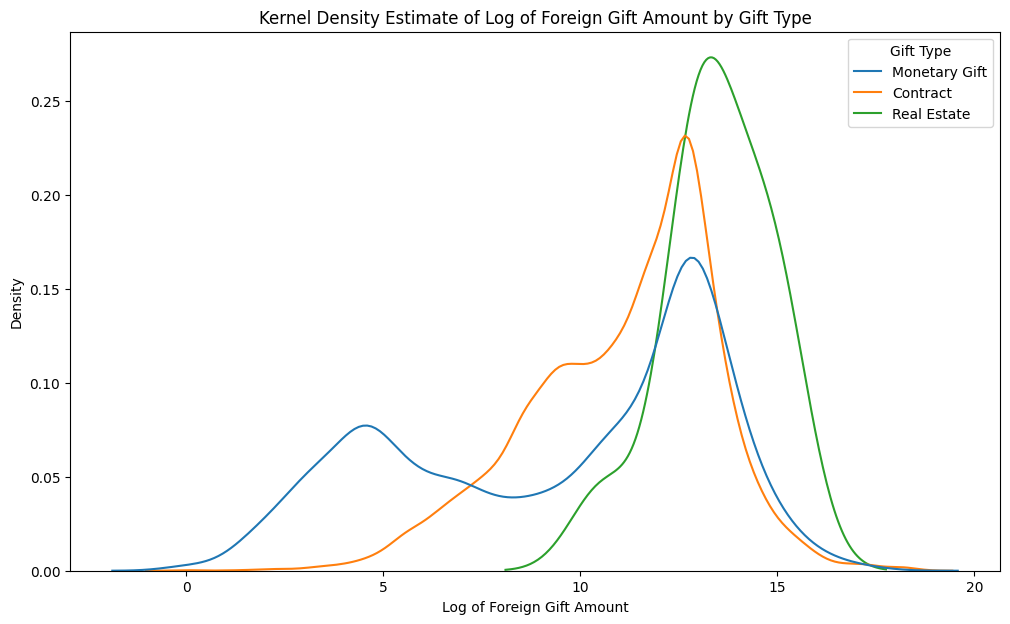

In [36]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data=gifts_positive_amount, x='log_Foreign_Gift_Amount', hue='Gift Type', fill=False, common_norm=False)
plt.title('Kernel Density Estimate of Log of Foreign Gift Amount by Gift Type')
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.show()

There is a larger distribution of Monetary Gifts, than the other gift types, highlighting the likelihood for these gift types to vary in value. For real estate, there is a more narrow distribution, likely because the value of a donated building does not vary too much (there are realistic limitations for minimum and maximum value; a building will not be worth 10 dollars). The distribution of Contracts is a bit more broad than real estate, but it is still somewhat constrained. All the Gift Types have their maximum density around the same Gift Amount.

There is no gift type with a "smooth" distribution, which is reflected in the non-group KDE plot.

In [38]:
gifts["Country of Giftor"].value_counts().head(15)

,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [47]:
idk = gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
idk

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [49]:
institutions = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)
institutions

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


In [55]:
gifts["Institution Name"].describe()

,Institution Name
count,28221
unique,318
top,"University of California, Los Angeles"
freq,3916


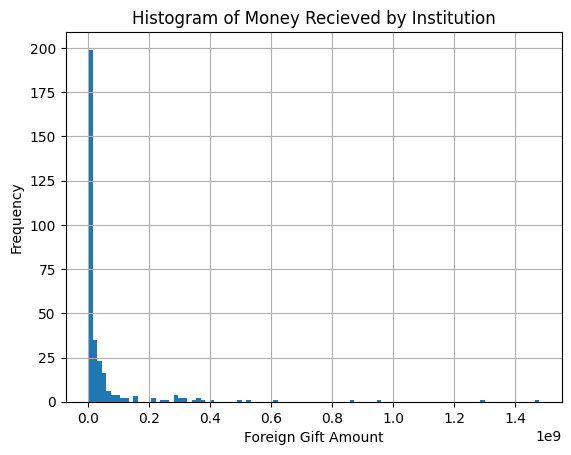

In [66]:
college_hist = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().hist(bins=100)
plt.title('Histogram of Money Recieved by Institution')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.show()

In [65]:
most_donated = gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)
most_donated

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [71]:
bnb = pd.read_csv("./EDA/assignment/data/airbnb_hw.csv")
bnb.head(5)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [78]:
bnb.shape

(30478, 13)

13 variables, 30478 observations

In [80]:
ct1=pd.crosstab(bnb['Room Type'], bnb['Property Type'])
ct1

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


There are significantly more "traditional" housing options (apartment, house and loft) than the others.

For bed & breakfasts, dorms, house, hut, other, tent and treehouse, it is more common for private rooms than renting the entire property.

<Axes: >

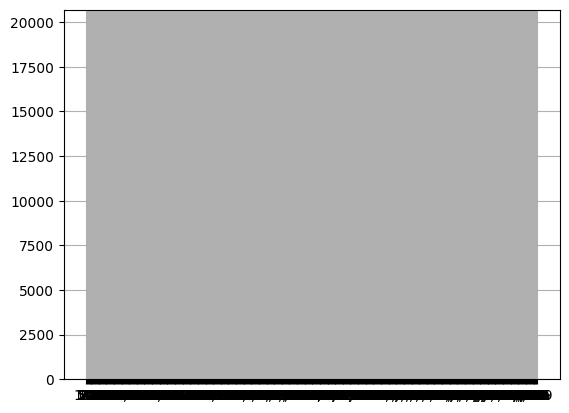

In [82]:
bnb["Price"].hist()

In [87]:
bnb['Price'] = bnb['Price'].replace({r'[$,]': ''}, regex=True).astype(float)

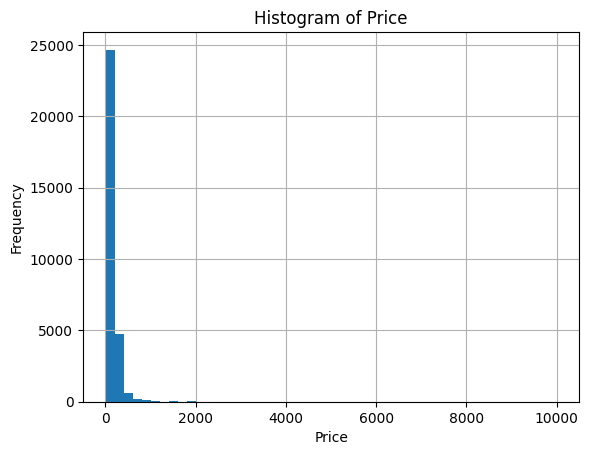

In [88]:
bnb['Price'].hist(bins=50)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

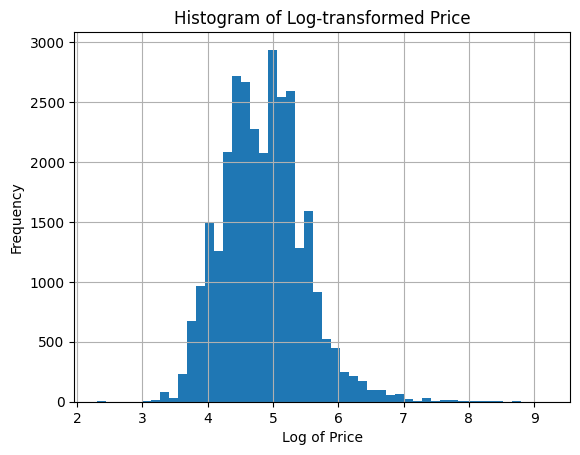

In [96]:
bnb['price_log'] = np.log(bnb['Price'])

bnb['price_log'].hist(bins=50)
plt.title('Histogram of Log-transformed Price')
plt.xlabel('Log of Price')
plt.ylabel('Frequency')
plt.show()

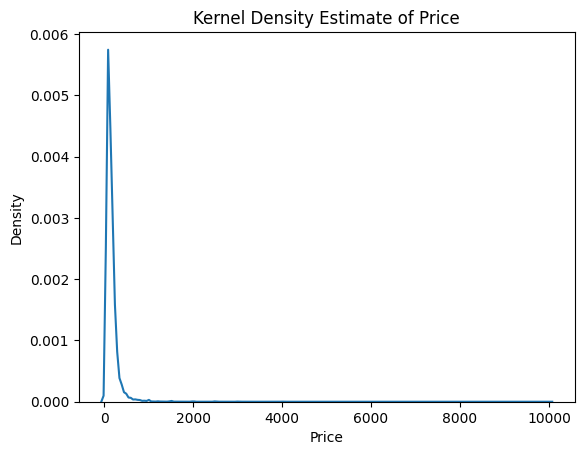

In [97]:
sns.kdeplot(bnb['Price'], fill=False)
plt.title('Kernel Density Estimate of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

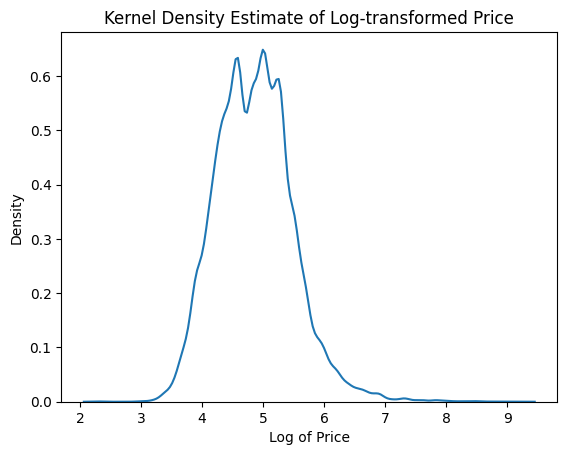

In [98]:
sns.kdeplot(bnb['price_log'], fill=False)
plt.title('Kernel Density Estimate of Log-transformed Price')
plt.xlabel('Log of Price')
plt.ylabel('Density')
plt.show()

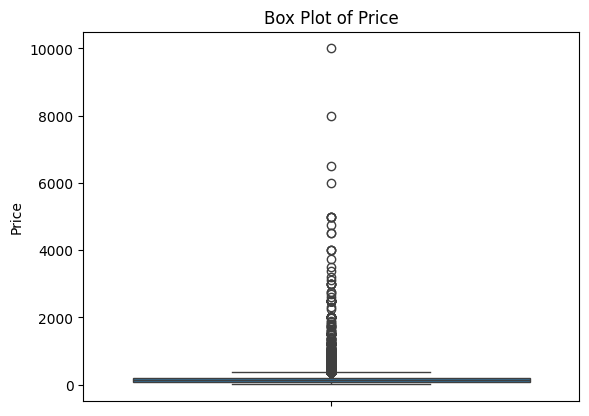

In [94]:
sns.boxplot(y=bnb['Price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

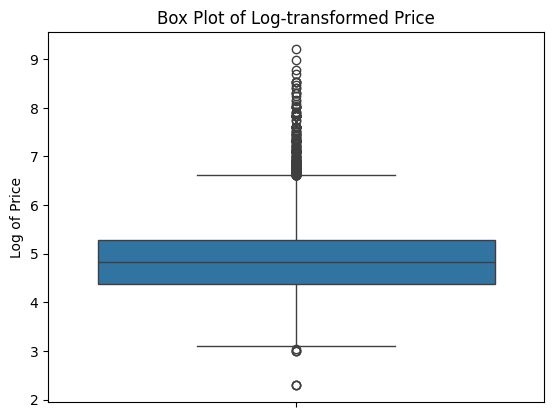

In [99]:
sns.boxplot(y=bnb['price_log'])
plt.title('Box Plot of Log-transformed Price')
plt.ylabel('Log of Price')
plt.show()

In [101]:
bnb["Price"].describe()

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


In [102]:
bnb["price_log"].describe()

,price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


yes, the data was poorly scaled with many outliers. Transforming it made it better, but as seen with the Box-Plot of log-transformed price, there are still many outliers (but less).

Text(0, 0.5, 'Number of Beds')

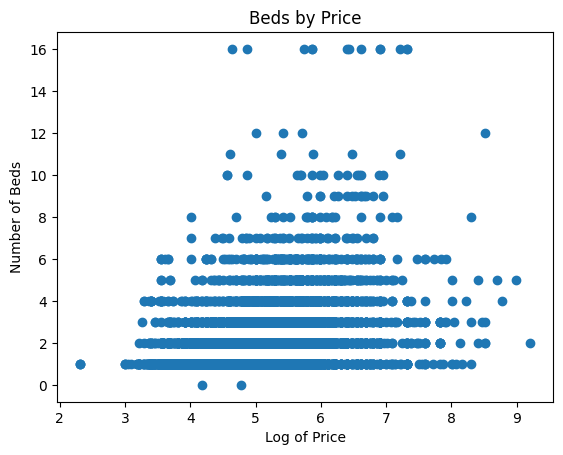

In [108]:
plt.scatter(x=bnb['price_log'], y=bnb['Beds'])
plt.title('Beds by Price')
plt.xlabel('Log of Price')
plt.ylabel('Number of Beds')

I see a lot of chaos. I am having trouble seeing any correlation between the two variables

In [119]:
something = bnb.groupby('Beds')['price_log']
something.describe()

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,4.476755,0.427613,4.174387,4.325571,4.476755,4.627939,4.779123
1.0,20344.0,4.686977,0.539666,2.302585,4.317488,4.605170,5.043425,8.294050
2.0,6610.0,5.094504,0.580425,3.218876,4.744932,5.075174,5.416100,9.210340
3.0,2071.0,5.340837,0.644742,3.258097,4.941642,5.298317,5.703782,8.517193
4.0,783.0,5.480463,0.721360,3.295837,5.010635,5.509388,5.926926,8.779557
5.0,284.0,5.669484,0.735623,3.555348,5.245705,5.669881,6.109248,8.987197
6.0,177.0,5.651790,0.824358,3.555348,5.293305,5.616771,6.052089,7.919356
7.0,45.0,5.617009,0.693481,4.007333,5.176150,5.703782,6.098074,6.802395
8.0,24.0,5.956200,0.862418,4.007333,5.495121,5.857933,6.176138,8.294050


In [122]:
joe=something.describe()

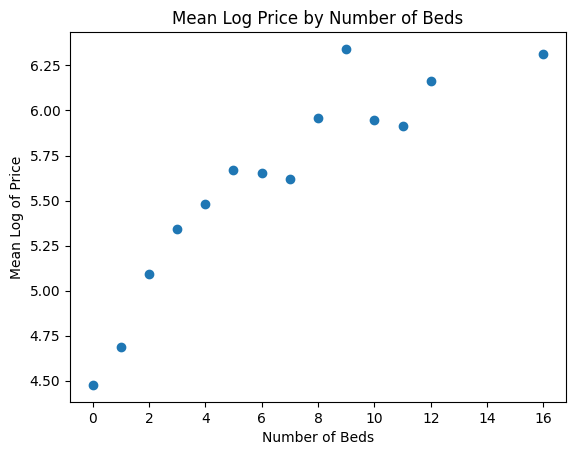

In [129]:
plt.scatter(x=joe.index, y=joe['mean'])
plt.title('Mean Log Price by Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Mean Log of Price')
plt.show()

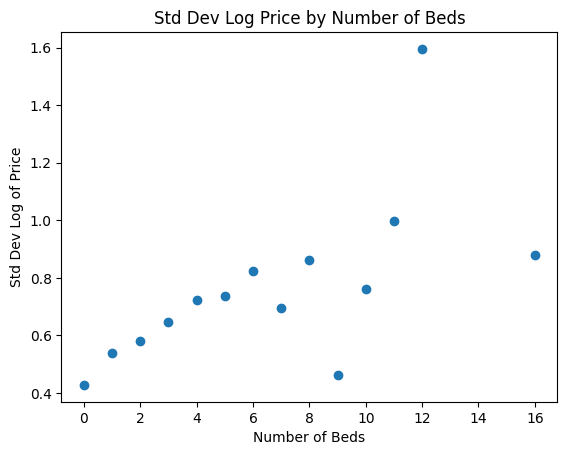

In [128]:
plt.scatter(x=joe.index, y=joe['std'])
plt.title('Std Dev Log Price by Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Std Dev Log of Price')
plt.show()

The average log price by bed seems to have a somewhat linear relationship, as does the standard deviation. The standard deviation gets a bit wonky past 8 beds, but there is still a hint of a relationship past that point.

  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?


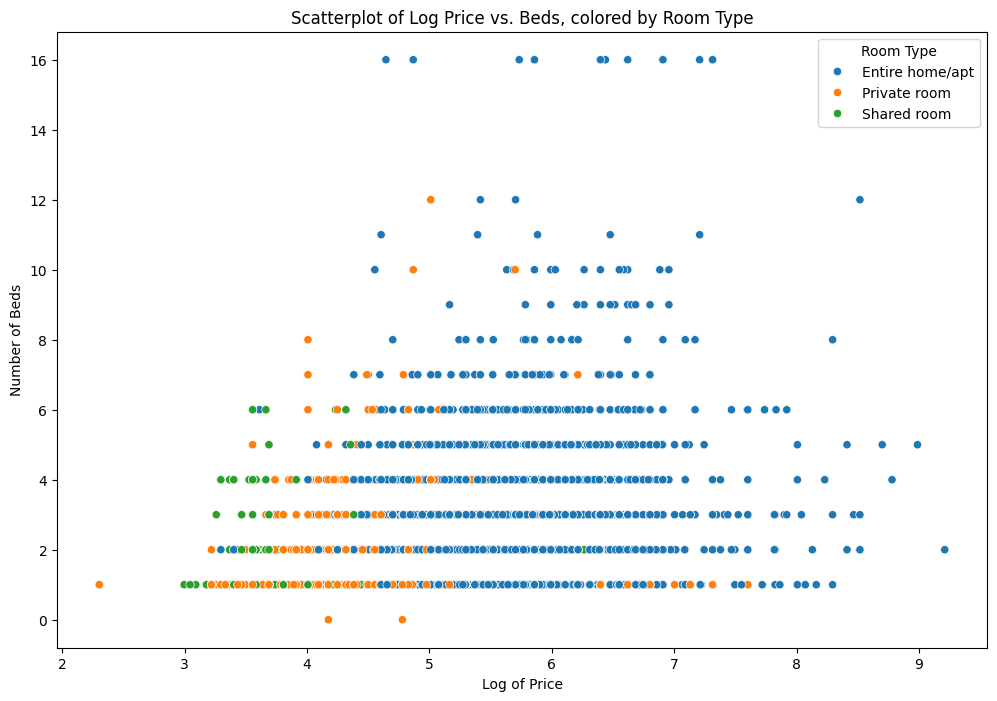

In [146]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bnb, x='price_log', y='Beds', hue='Room Type')
plt.title('Scatterplot of Log Price vs. Beds, colored by Room Type')
plt.xlabel('Log of Price')
plt.ylabel('Number of Beds')
plt.show()

I don't see a lot of clear patterns, but shared rooms tend to be the cheapest and have the least amount of beds. Private rooms generally fall in the middle price range and usually have between 1-4 beds. Entire home/apt tend to be the most expensive, and have the most variability in number of beds

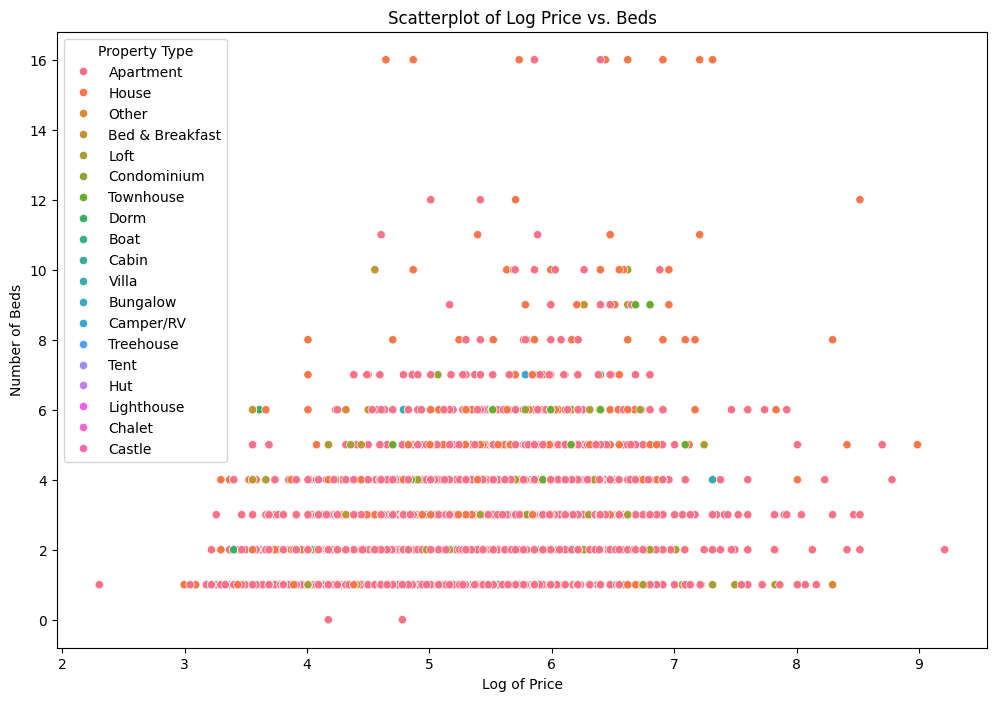

In [153]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bnb, x='price_log', y='Beds', hue='Property Type')
plt.title('Scatterplot of Log Price vs. Beds')
plt.xlabel('Log of Price')
plt.ylabel('Number of Beds')
plt.show()

Similar to the above graph, I do not see a lot of clear patterns. "Traditional" housing types dominate the data set and have a lot of price range, along with a lot of range in number of beds.

In [151]:
price_by_room_property = bnb.groupby(['Room Type', 'Property Type'])['Price'].describe()
price_by_room_property

count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.00   39.0    39.00     39.0  
                Loft             160.00  225.0   379.00   3000.0  
                Other            140.00  300.0 

"Other" has the highest average for entire home/apt and private room. Treehouse has the highest average for shared room. Other has the highest std dev for entire home/apt and private room. Houses have the highest std dev for shared rooms.

This means that the median is probably more reliable for estimating central tendency, as means are sensitive to outliers, which can be seen in the large standard deviation values.

  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

<Figure size 1000x800 with 0 Axes>

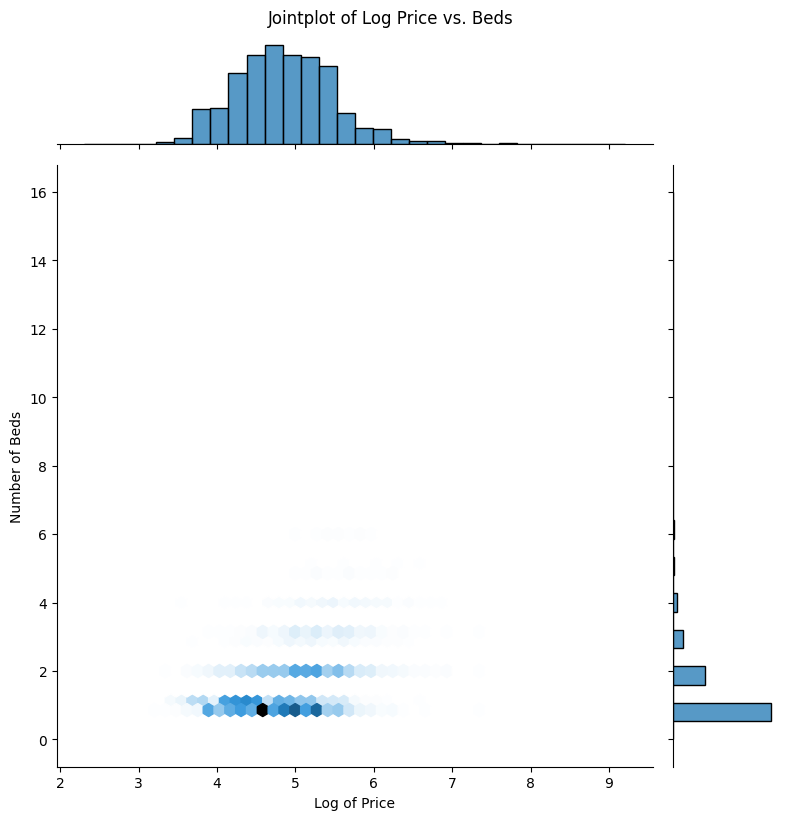

In [158]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=bnb, x='price_log', y='Beds', kind='hex', height=8, marginal_kws=dict(bins=30))
plt.suptitle('Jointplot of Log Price vs. Beds', y=1.02)
plt.xlabel('Log of Price')
plt.ylabel('Number of Beds')
plt.show()

#Code by GeminiAI

Most of the data is distributed around 1 bed, log price = 4.5. It impacts the way I see 5 and 6, because those plots contained a lot of data, but it was difficult to tell a meaningful story (especially with 6, 5 was pretty chill). It just helps give a better idea of where the data actually is, as the high outliers negatively impacted data visualization and interpretation,

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [160]:
oil = pd.read_csv("./EDA/assignment/data/drilling_rigs.csv")
oil.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [162]:
oil.shape

(623, 10)

10 variables, 623 observations

In [164]:
oil.dtypes

,0
Month,object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",int64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",int64
"Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",object
"Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",int64
Active Well Service Rig Count (Number of Rigs),object


"Not Avaliable" will need to be converted to Nan, so the numerical variables that are showing as objects can be properly read. Because numbers aren't objects, they should be int64

In [168]:
# Identify columns that are 'object' type but should be numeric
object_cols = oil.select_dtypes(include='object').columns.tolist()

# Exclude 'Month' from the conversion process as it's a datetime column
if 'Month' in object_cols:
    object_cols.remove('Month')

for col in object_cols:
    # Replace 'Not Available' with NaN
    oil[col] = oil[col].replace('Not Available', np.nan)
    # Convert to numeric, coercing any other errors to NaN
    oil[col] = pd.to_numeric(oil[col], errors='coerce')

oil.dtypes

#Code by GeminiAI

,0
Month,object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",int64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",int64
"Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",float64
"Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",int64
Active Well Service Rig Count (Number of Rigs),float64


In [173]:
oil['time'] = pd.to_datetime(oil['Month'], format='mixed')

3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.


In [175]:
fig = px.line(oil, x='time', y="Active Well Service Rig Count (Number of Rigs)")
fig.show()

From beginning to end, there is a net decrease. However, there was in increase leading to the maximum value in 1982, which was followed by subsequent decline, interupted by occasional spikes in numbers. But since 1982, there was a downward decline.

4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.


In [176]:
oil['Rig Count Difference'] = oil['Active Well Service Rig Count (Number of Rigs)'].diff()

fig = px.line(oil, x='time', y='Rig Count Difference')
fig.update_layout(title_text='First Difference of Active Well Service Rig Count Over Time',
                  xaxis_title='Time',
                  yaxis_title='Change in Rig Count')
fig.show()

I see a very volatile plot with no clear pattern. The 20 year period following 1980 had the most(?) volatility. After 2000, there was one major downward spike, but there was limited high volatility.

In [179]:
together = ['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)','Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)']

oil_melted = oil.melt(id_vars=['time'], value_vars=together,
                      var_name='Rig Type', value_name='Rig Count')

fig = px.line(oil_melted, x='time', y='Rig Count', color='Rig Type',
              title='Onshore and Offshore Rig Counts Over Time')
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Rig Count'
)
fig.show()

#SOME of the code by GeminiAI